## 1. Multiple Linear Regression (Visual Demonstration)

This section uses a small dataset with two input features to visualize
how a regression plane fits the data.

In [75]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import r2_score

In [76]:
df = pd.read_csv("data/multiple_linear_regression_dataset.csv")

In [77]:
df.shape

(20, 3)

In [78]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


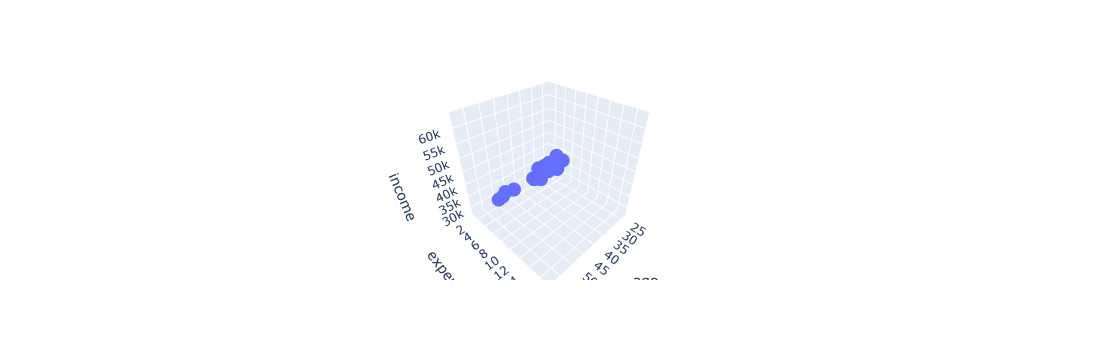

In [79]:
fig = px.scatter_3d(df, x = "age", y="experience", z = "income")
fig.show()

In [80]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [82]:
X_train.shape

(16, 2)

In [83]:
X_test.shape

(4, 2)

In [84]:
y_train.shape

(16,)

In [85]:
y_test.shape

(4,)

In [86]:
class MultipleLinearRegression:
    """
    Multiple Linear Regression implemented from scratch
    using the Normal Equation.
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # Calculate the value of coefficients
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [87]:
lr = MultipleLinearRegression()

In [88]:
lr.fit(X_train, y_train)

In [89]:
y_pred = lr.predict(X_test)

In [90]:
r2_score(y_test, y_pred)

0.9579002513351086

In [91]:
x = np.linspace(df['age'].min(), df['age'].max(), 20)
y = np.linspace(df['experience'].min(), df['experience'].max(), 20)

xGrid, yGrid = np.meshgrid(x, y)

final = np.c_[xGrid.ravel(), yGrid.ravel()]
z = lr.predict(final).reshape(xGrid.shape)


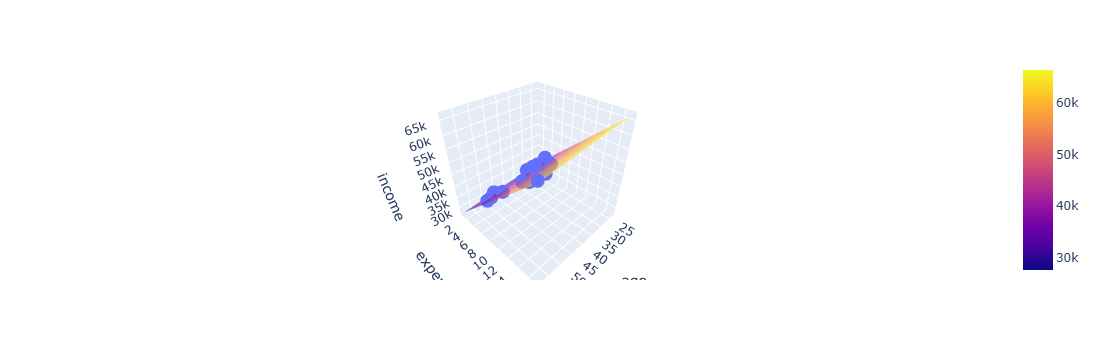

In [92]:
fig = px.scatter_3d(df, x='age', y='experience', z='income')

fig.add_trace(go.Surface(x=x, y=y, z=z, opacity=0.6))

fig.show()


## 2. Model Evaluation on Higher-Dimensional Data

Visualization is not possible beyond two features.
In this section, the same model is evaluated using R² score
on a dataset with more features.

In [93]:
df2 = pd.read_csv("data/Student_Performance.csv")

In [94]:
df2.shape

(10000, 6)

In [95]:
df2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [96]:
df2.drop(columns="Extracurricular Activities", inplace=True)

The categorical feature Extracurricular Activities is removed to keep the implementation focused on numerical features, as this model does not include encoding techniques.

In [97]:
df2.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [98]:
df2.shape

(10000, 5)

In [99]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [101]:
X_train.shape

(8000, 4)

In [102]:
X_test.shape

(2000, 4)

In [103]:
y_train.shape

(8000,)

In [104]:
y_test.shape

(2000,)

In [105]:
lr2 = MultipleLinearRegression()

In [106]:
lr2.fit(X_train, y_train)

In [107]:
y_pred = lr2.predict(X_test)

In [108]:
r2_score(y_test, y_pred)

0.9887873065706715

This notebook demonstrates Multiple Linear Regression from scratch using both visual intuition (2 features) and numerical evaluation on higher-dimensional data. The same implementation generalizes across datasets without modification.